In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('lighthouse.jpg')

Text(0.5, 1.0, 'Original Image')

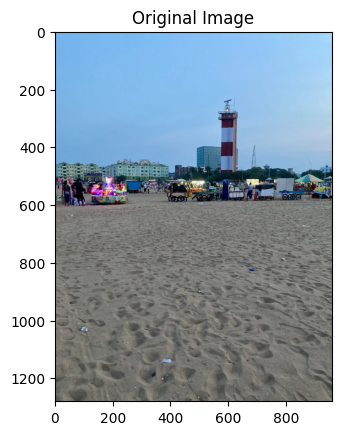

In [27]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

**Resizing of Image**

In [19]:
new_width = 300
new_height = 300
resized_image = cv2.resize(image, (new_width, new_height))

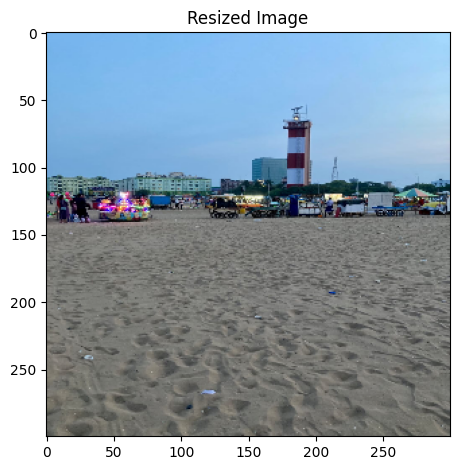

In [43]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.tight_layout()
plt.show()

**Grayscale Image**

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

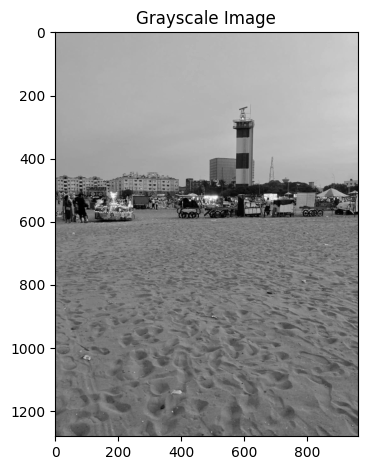

In [66]:
plt.subplot(1, 1, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.tight_layout()
plt.show()

**Histogram Equalization**

In [8]:
equalized_image = cv2.equalizeHist(gray_image)

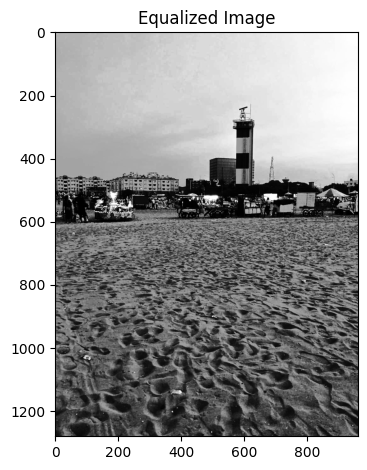

In [41]:
plt.subplot(1, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.tight_layout()
plt.show()

**Gaussian Blur**

In [44]:
kernel_size_1 = 3
blurred_image_a = cv2.GaussianBlur(image, (kernel_size_1, kernel_size_1), 0)

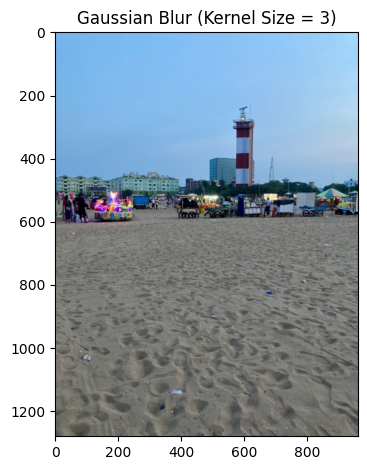

In [50]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(blurred_image_a, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur (Kernel Size = {})'.format(kernel_size_1))
plt.tight_layout()
plt.show()

In [45]:
kernel_size_2 = 9
blurred_image_b = cv2.GaussianBlur(image, (kernel_size_2, kernel_size_2), 0)

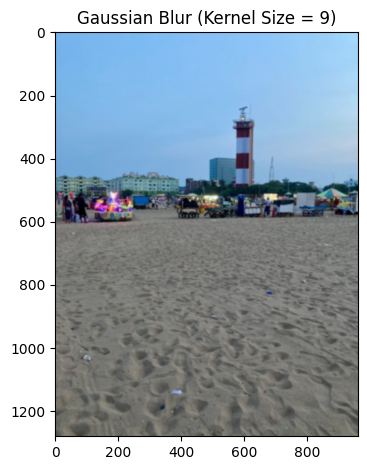

In [51]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(blurred_image_b, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur (Kernel Size = {})'.format(kernel_size_2))
plt.tight_layout()
plt.show()

**Median Filter**

In [48]:
median_blurred_image = cv2.medianBlur(image, 5)

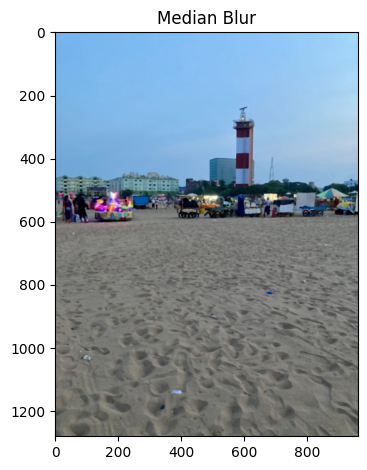

In [52]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(median_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Median Blur')
plt.tight_layout()
plt.show()

**Bilateral Filter**

In [53]:
bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

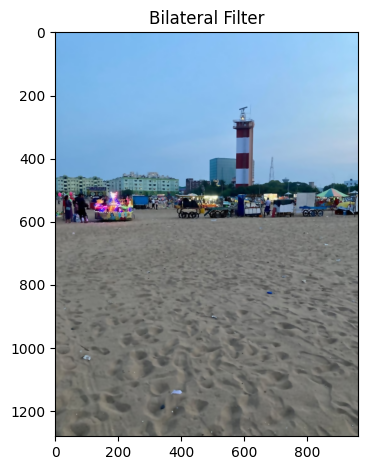

In [55]:
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')
plt.tight_layout()
plt.show()

**Sharpening** <br>
sharpening filter used - 3x3 kernel with a center weight of 9 and surrounding weights of -1

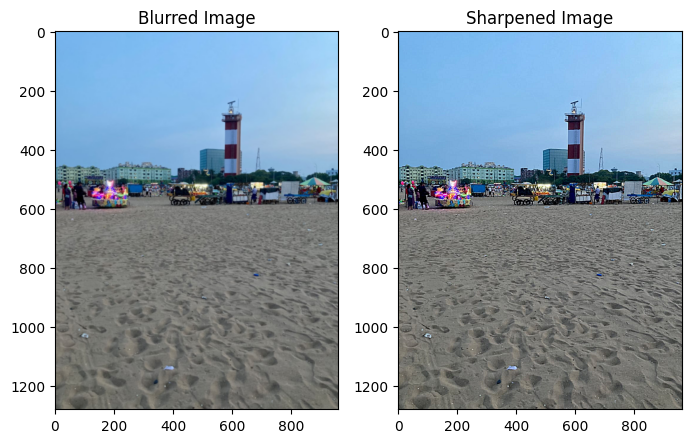

In [56]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# sharpening filter
sharpening_filter = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_filter)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

**Thresholding - creating a binary image**

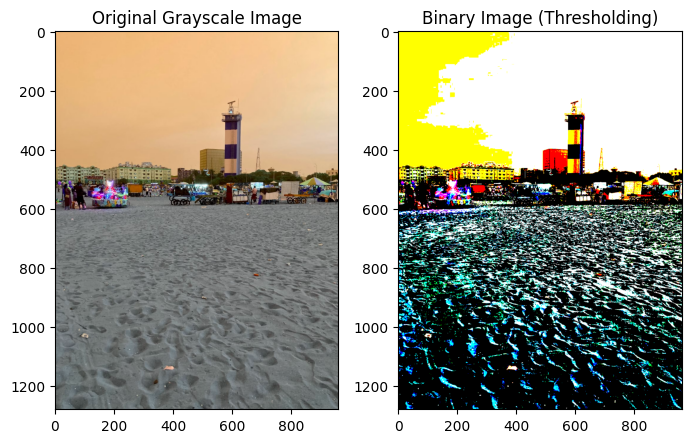

In [64]:
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Thresholding)')

plt.tight_layout()
plt.show()


**Edge Detection - Canny**

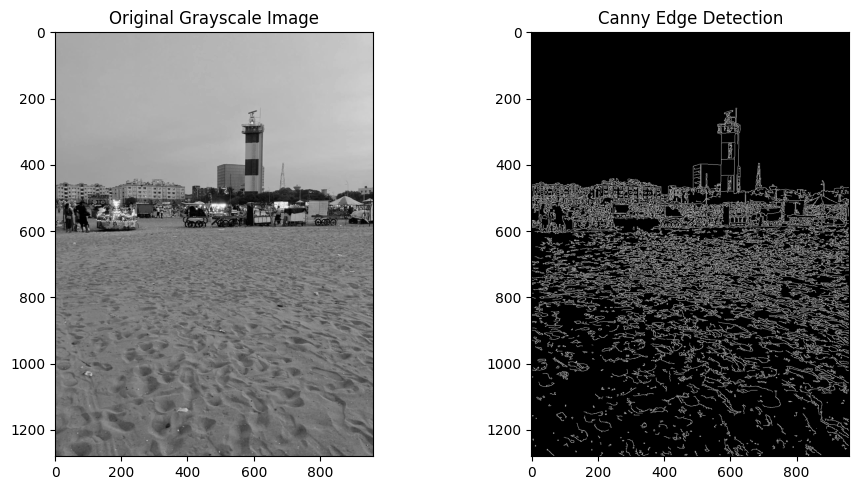

In [71]:
image = cv2.imread('lighthouse.jpg', cv2.IMREAD_GRAYSCALE)

# Canny edge detection
edges = cv2.Canny(image, 50, 150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()


**Edge Detection - Sobel**

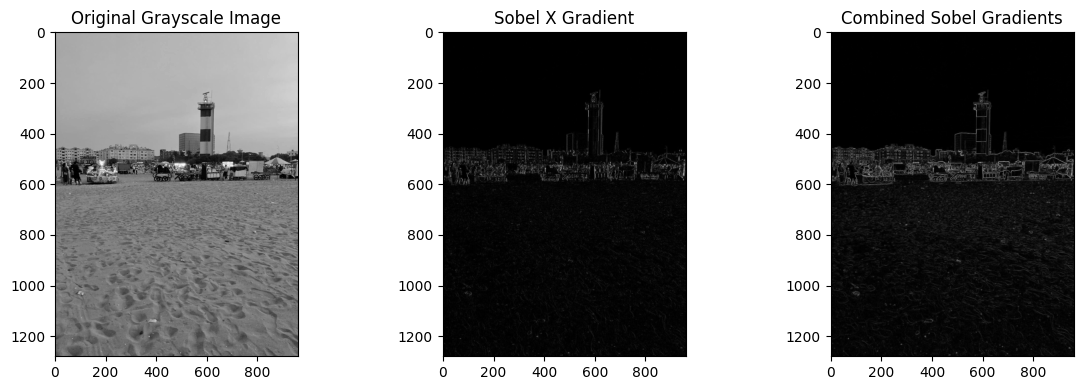

In [72]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the x and y gradients
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the images with labels
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X Gradient')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Combined Sobel Gradients')

plt.tight_layout()
plt.show()


**Data Augmentation - Rotation, Flipping and Scaling**

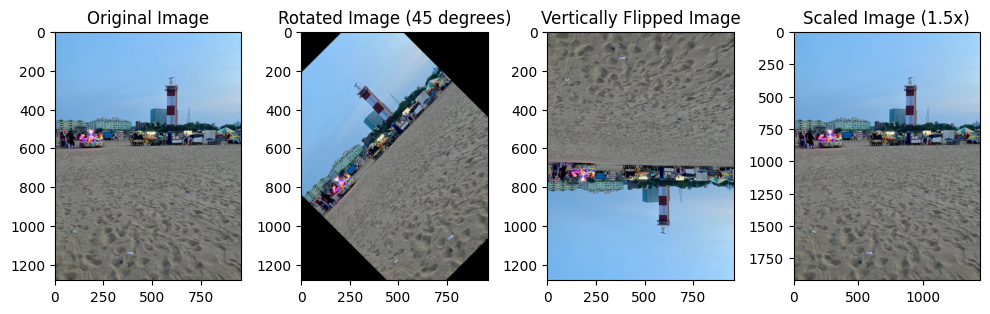

In [77]:
image = cv2.imread('lighthouse.jpg')

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Rotation
angle = 45
rows, cols, _ = image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')

# Flipping
flipped_image = cv2.flip(image, 0)  # 1 for horizontal flip, 0 for vertical flip, -1 for both

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
plt.title('Vertically Flipped Image')

# Scaling
scale_factor = 1.5
scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image (1.5x)')

plt.tight_layout()
plt.show()

**Cropping**

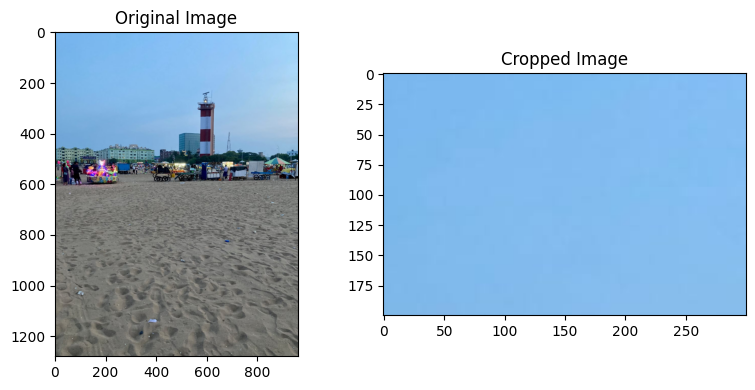

In [78]:
# Defining region of interest (ROI) coordinates
x, y, width, height = 100, 50, 300, 200

# Crop the image
cropped_image = image[y:y+height, x:x+width]

plt.figure(figsize=(8, 4))

# Display the original and cropped images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')

plt.tight_layout()
plt.show()


**Color Image Conversion - RGB to HSV**

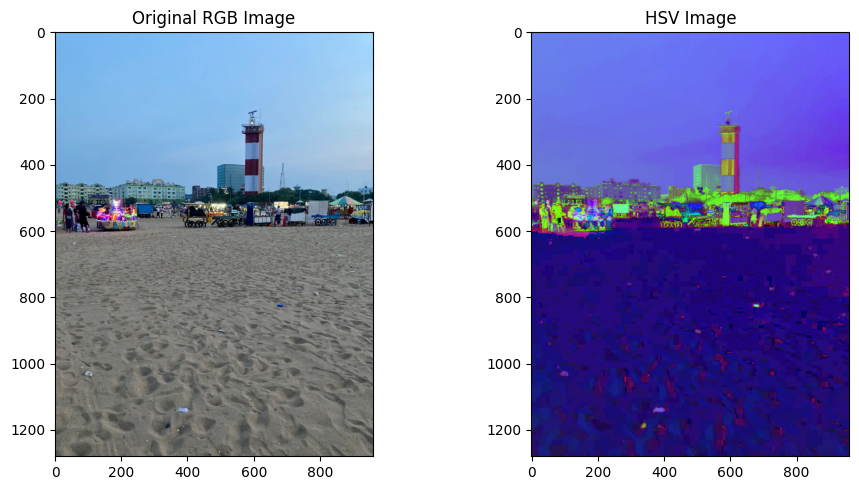

In [79]:
# Convert the image from BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HSV
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(hsv_image)
plt.title('HSV Image')

plt.tight_layout()
plt.show()


**Super Resolution**

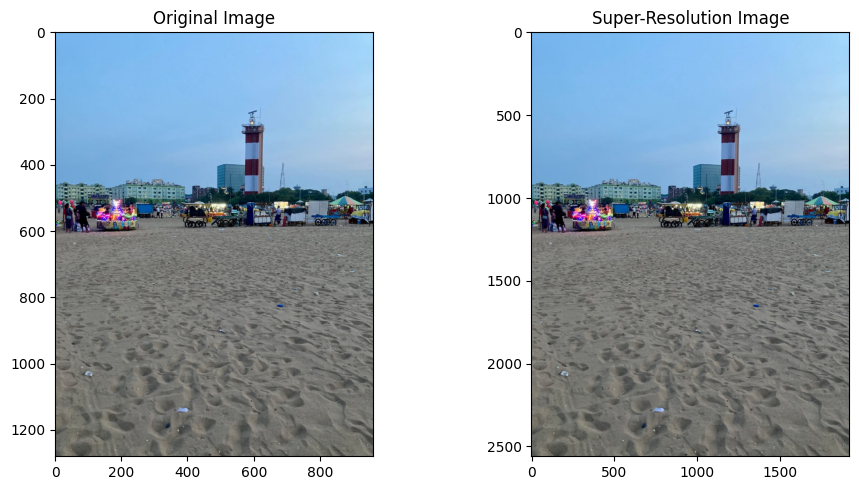

In [80]:
# Define the target size for super-resolution
target_width, target_height = 2 * image.shape[1], 2 * image.shape[0]

# Resize the image using interpolation (e.g., cubic interpolation)
super_res_image = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_CUBIC)

# Display the images with labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(super_res_image, cv2.COLOR_BGR2RGB))
plt.title('Super-Resolution Image')

plt.tight_layout()
plt.show()
